In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

On note $\alpha = (\alpha_1, \alpha_2, \alpha_3, \alpha_4) \in \mathbb{R}^4 $

Le problème des moindres carrés correspondant à l'identification de $\alpha$ dans (2) est : 

$ \alpha = argmin_{x \in \mathbb{R}^4}||Dx^T-v_{réelle}||^2 $ où, $ \forall i \in [0, N], A_{i, \cdot} = \Delta t(1, -v_i, I(i), T(i))$ et $v_{réelle,i} = v(i) $

0.009996924023377422
[[ 0.          0.          0.          0.        ]
 [ 0.00999692 -0.01999392  0.05758902  0.12740193]
 [ 0.00999692 -0.01999487  0.0502142   0.13189035]
 ...
 [ 0.00999692 -0.08770676  0.06300057  0.04902731]
 [ 0.00999692 -0.08768355  0.06821077  0.0435031 ]
 [ 0.00999692 -0.08766105  0.06267336  0.0435031 ]]
[-0.29420778  0.02131773  0.02853838  0.01429096]


,Unnamed: 0,Time [s],Vitesse [m/s],Couple pédale [Nm],I [A]
0,0,0.00,2.000000,12.156987,5.745567
1,1,0.01,2.000007,12.744113,5.760674
2,2,0.02,2.000103,13.193093,5.022965
3,3,0.03,2.000051,13.227630,5.639821
4,4,0.04,2.000181,13.676609,6.531113


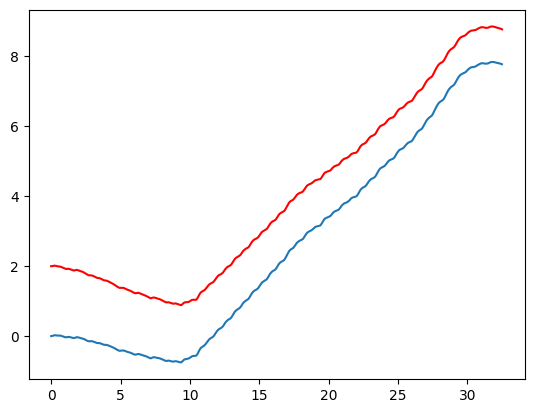

In [45]:
df = pd.read_csv("data_velo.csv")

vitesse = df["Vitesse [m/s]"].tolist()
intensite = df["I [A]"].tolist()
couple = df["Couple pédale [Nm]"].tolist()
temps = df["Time [s]"].tolist()

N = len(temps)
deltat = max(temps)/N
print(deltat)

D = np.array([[deltat, -deltat*vitesse[i], deltat*intensite[i], deltat*couple[i]] for i in range(N)])
D[0] = [0,0,0,0]
print(D)

vitesse_decalee = vitesse[1:] + [vitesse[-1]]

alpha = np.linalg.lstsq(D, np.array(vitesse_decalee) - np.array(vitesse), rcond=None)[0]

print(alpha)


vitesse_simulee = [0]
for i in range(N-2): 
    vitesse_simulee.append(vitesse_simulee[i] + deltat*(alpha[0] - alpha[1]*vitesse_simulee[i] + alpha[2]*intensite[i] + alpha[3]*couple[i]))

plt.plot(temps, vitesse, 'r')
plt.plot(temps[:N-1], vitesse_simulee)
df.head()

7.a) 
On considère la matrice $A = A^T_kA_k$ définie positive (par hypothèse), et on définit $ U=a_{k+1} \in M _{m,1}(\mathbb{R})$.
On a donc aussi $\tilde{A} = A^T_{k+1}A_{k+1}$ qui est inversible. Ainsi, d'après la formule de SHerman-Morrison-Woodburry :
$$ \tilde{A}^{-1} = A^{-1} - A^{-1}U(I_p + U^TA^{-1}U)^{-1}U^TA^{-1}$$
Donc comme $p=1$ et $U=a_{k+1}$ :  
$$ \tilde{A}^{-1} = A^{-1} - A^{-1}a_{k+1}\frac{1}{1 + a_{k+1}^TA^{-1}a_{k+1}}a_{k+1}^TA^{-1}$$

Avec  $A = A^T_kA_k$ et en introduisant $\gamma_k = \frac{1}{1 + a_{k+1}^TA^{-1}a_{k+1}}$ :  
$$ \tilde{A}^{-1} = (A^T_kA_k)^{-1} - \gamma_k(A^T_kA_k)^{-1}a_{k+1} a_{k+1}^T(A^T_kA_k)^{-1}$$

Avec $K_k = \gamma_k(A^T_kA_k)^{-1}a_{k+1}$ on obtient : 

$$ \tilde{A}^{-1} = (A^T_kA_k)^{-1} - K_k a_{k+1}^T(A^T_kA_k)^{-1}$$

7. b)
Par définition, on a:
$$x_{k+1} = (A^T_{k+1}A_{k+1})^{-1}A^T_{k+1}b_{k+1} =  \tilde{A}^{-1}A^T_{k+1}b_{k+1}$$
D'où, avec la 7.a) :

$$
\begin{align*}
    x_{k+1} & = [(A^T_kA_k)^{-1} - K_k a_{k+1}^T(A^T_kA_k)^{-1}]A^T_{k+1}b_{k+1} \\
            & = \quad(A^T_kA_k)^{-1}A^T_{k+1}b_{k+1}- K_k a_{k+1}^T(A^T_kA_k)^{-1}A^T_{k+1}b_{k+1}
\end{align*}
$$

Or : $A^T_{k+1}b_{k+1} = (A^T_k, a_{k+1})(b_k, \tilde{b}) = A^T_kb_k + \tilde{b}a_{k+1}$

Donc : 

$$
\begin{align*}
    x_{k+1} &= (A^T_kA_k)^{-1}(A^T_kb_k + \tilde{b}a_{k+1})- K_k a_{k+1}^T(A^T_kA_k)^{-1}(A^T_kb_k + \tilde{b}a_{k+1}) \\
            & = \quad x_k + \tilde{b}(A^T_kA_k)^{-1} a_{k+1}- K_k a_{k+1}^Tx_k - \tilde{b}K_k a_{k+1}^T(A^T_kA_k)^{-1}a_{k+1} \\
            & = \quad x_k + \frac{\tilde{b}}{\gamma_k}K_k- K_k a_{k+1}^Tx_k - \tilde{b}K_k a_{k+1}^T(A^T_kA_k)^{-1}a_{k+1} \\
            & = \quad x_k + K_k(\frac{\tilde{b}}{\gamma_k}- a_{k+1}^Tx_k - \tilde{b}a_{k+1}^T(A^T_kA_k)^{-1}a_{k+1}) \\
            & = \quad x_k + K_k(\frac{\tilde{b}}{\gamma_k}- a_{k+1}^Tx_k - \tilde{b}(\frac{1}{\gamma_k}-1)) \\
            & = \quad x_k + K_k(\tilde{b}- a_{k+1}^Tx_k)
\end{align*}
$$

7. c)
On peut definir un algorithme ne nécessitant pas d'inversion de matrices au cours des itérations car en exprimant $x_{k+1}$ en fonction de $x_k$, l'inversion apparaît dans $K_k$. Or il est question d'inverser $(A^T_kA_k)$, chose que nous pouvons faire sans le calculer explicitement étant donnée la relation de récurrence (7).

In [61]:
a = np.array([[deltat, -deltat*vitesse[i], deltat*intensite[i], deltat*couple[i]] for i in range(N)])
b = np.array([[vitesse_decalee[i]-vitesse[i]] for i in range(N-1)])


def SMW(n):
    if n == 0 :
        return np.linalg.inv(np.dot(a[0][:, np.newaxis], a[0][np.newaxis, :]))

    else : 
        gamma = 1/(1 + np.dot(a[n], np.dot(SMW(n-1), a[n])))
        K = gamma * np.dot(SMW(n-1), a[n])
        return SMW(n-1) - np.dot(np.outer(K, a[n]), SMW(n-1))



def moindres_carres_recursifs(n):
    if n == 0 :
        x_0 = np.dot(SMW(0), np.transpose(a[0]))*b[0]
        return x_0
    else : 
        gamma = 1/(1 + np.dot(a[n], np.dot(SMW(n-1), a[n])))
        K = gamma * np.dot(SMW(n-1), a[n])
        return moindres_carres_recursifs(n-1) + K(b[n] - np.dot(a[n],moindres_carres_recursifs(n-1)))

print(np.linalg.inv(np.dot(a[0][:, np.newaxis], a[0][np.newaxis, :])))


LinAlgError: Singular matrix

# 3e partie


9. Il y a en toute généralité un autre terme à prendre en compte lié à la pente de la route lorsqu'on n'est plus en terrain plat. En l'occurence ce terme est une fonction de la position $\gamma$ qui n'est pas linéaire

Si la pente est nulle, la fonction f ne dépend plus que de 